##Instructions




1. For every data visualization you make, add a proper description on the axes. Even if the variable name isn't terrible, explicitly add them. This is worth 1 point per axis per problem!
2. For each question asking you to make a calculation, you must add a comment or a markdown cell explicitly answering the question. **Python output alone is insufficient.**

## 0. Load Stuff

Load the `pandas`, `matplotib`, and `seaborn` libraries.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Load in the [dataset](https://raw.githubusercontent.com/fivethirtyeight/data/refs/heads/master/voter-registration/new-voter-registrations.csv) as a dataframe named "voters".

In [ ]:
voters = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/refs/heads/master/voter-registration/new-voter-registrations.csv")
display(voters.head())  # checking it worked

,Jurisdiction,Year,Month,New registered voters
0,Arizona,2016,Jan,25852
1,Arizona,2016,Feb,51155
2,Arizona,2016,Mar,48614
3,Arizona,2016,Apr,30668
4,Arizona,2020,Jan,33229


##Introduction (10 points)
You've been hired to work with a government organization interested in formation about voter registration in the United States. They have asked you to come up with two research questions--one about national trends and one about a state trend of your choice.

Clearly state:
* the purpose of your project
* what the goal is
* why it is important for someone to read this notebook?

In additon, state your two research questions

* Question 1:
* Question 2:



* Purpose of the Project- The purpose of this project is to analyze data from voter registration in 2016 and 2020 to compare them, to look at trends in the United States by election year, month, and state.
* Goal- The goal is to find trends in New voter registration given the data, and analyze it to make decisions about new engagement in the voting system.
* Why is it Important?- This is important for politicians, lobbyists, campaigns, anyone who is infuenced by elections and voting, as new registered voters play a role in getting a person elected.
* Question 1: How has voter registration in California changed from 2016 to 2020?
* Question 2: How does the month influence New voter registration throughout the years on a National level?




## 1. Data Processing (8 points)

Show the first five rows of data and explain what the variable names are. (5 points)

In [ ]:
voters.head(5)

,Jurisdiction,Year,Month,New registered voters
0,Arizona,2016,Jan,25852
1,Arizona,2016,Feb,51155
2,Arizona,2016,Mar,48614
3,Arizona,2016,Apr,30668
4,Arizona,2020,Jan,33229


* The variables are "jurisdiction" "year" "month" and "new registered Voters". jurisdiction means where they are looking (in this case it looks like all states), year is the year of the new voter registrations that are being displayed, month is the same but the specific month of the year given, and new registered voters means the number of people who registered to vote in that state, given the month and year.


Check for any missing data. (1 point)

In [ ]:
null = voters.isnull()
null.value_counts()

,,,,count
Jurisdiction,Year,Month,New registered voters,
False,False,False,False,106


* There is no missing data because isnull returned everything as false


Check your data types. (1 point)

In [ ]:
voters.dtypes

,0
Jurisdiction,object
Year,int64
Month,object
New registered voters,int64


* The jurisdiction column data type is objects, meaning a string or a text; month is also an object because it is typed out instead of using a numerical value 1-12. Year and new registered voters are both integers meaning you can preform math on them and they are all numerical values


Rename the jurisdiction column to "NAME" and the "New registered voters" to "registered_voters" to use througout the notebook. (2 points)

In [ ]:
voters = voters.rename(columns= {"Jurisdiction":"NAME" , "New registered voters":"registered_voters"})
voters

,NAME,Year,Month,registered_voters
0,Arizona,2016,Jan,25852
1,Arizona,2016,Feb,51155
2,Arizona,2016,Mar,48614
3,Arizona,2016,Apr,30668
4,Arizona,2020,Jan,33229
...,...,...,...,...
101,Virginia,2020,Jan,25934
102,Virginia,2020,Feb,29507
103,Virginia,2020,Mar,31492
104,Virginia,2020,Apr,5467


Explain any potential limitations to your data (2 points)

In [ ]:
voters.value_counts("NAME") #seeing how many times each state comes up and how many are listed

,count
NAME,
Maryland,10
North Carolina,10
Texas,10
District of Columbia,10
Virginia,10
Colorado,8
California,8
Arizona,8
Delaware,8


In [ ]:
voters.value_counts("Month") # seeing how many times each month comes up

,count
Month,
Apr,24
Feb,24
Jan,24
Mar,24
May,10


In [ ]:
voters.value_counts("Year") #seeing how many times each year comes up

,count
Year,
2016,53
2020,53


The potential limitations of this data set is that there is only 12 states listed (one of them being washington dc which doesnt count as a state) so they leave out 39 states from the data set, also some states have more data then others, for example alabama has 10 entries while illinois (a bigger state) only has 8. One other limitation is that the data in the month and year columns is not consistant meaning it will be hard to compare the data as they only take data from election years and uses the first 5 months of the year so its hard to get a long term comparison. The code above is just me checking how many times each thing shows up in the columns, since you can't get a good grasp only looking at the first 5 columns.

###Exploratory Data Analysis (20 points, as noted)

When was the highest amount of new voter registration? Show the state, month, year, and number of registered voters. (5 points)



In [ ]:
highvoters = voters.sort_values(by="registered_voters", ascending=False) #sorting the values in the registered coters collumn from highets to lowest
highvoters.head(1)   # showing only the top result

,NAME,Year,Month,registered_voters
13,California,2020,Feb,238281


* The highest amount of new voter registration was Febuary 2020, in California, with 238,281 new voters registered

What is the average voter registration? (1 points)

In [ ]:
average = voters["registered_voters"].mean(). # finding the average of the registered voters collumn
average

np.float64(48223.46226415094)

The average number of new voters regitered is 48,223 people a month

Create a dataframe called "high_voters" showing only the times where voter registration was higher than your above average. How many times did this happen? (3 points)


In [ ]:
high_voters = voters.loc[voters["registered_voters"] > 48223] #Locating the rows where the registered voters collumn is above the average
high_voters

,NAME,Year,Month,registered_voters
1,Arizona,2016,Feb,51155
2,Arizona,2016,Mar,48614
5,Arizona,2020,Feb,50853
8,California,2016,Jan,87574
9,California,2016,Feb,103377
10,California,2016,Mar,174278
11,California,2016,Apr,185478
12,California,2020,Jan,151595
13,California,2020,Feb,238281
14,California,2020,Mar,176810


* Voter registration was above average 93 times in the dataframe

How many times did each state go above the national average for new voter registration? (2 points)



In [ ]:
high_voters.value_counts("NAME")  #checking how many times each state shows up in the new dataset made above

,count
NAME,
Texas,8
Florida,7
California,7
North Carolina,6
Illinois,4
Arizona,3
Georgia,1


* Texas went above the national average 8 times, Florida and California went over 7 times, North Carolina went over 6 times, Illinois went over 4 times, Arizona went over 3 times, and Georgia went over 1 time, as depicted in the dataset above.

Which three states had the highest average voter registration overall? Show only the top three results. (5 points)

In [ ]:
state_average = voters.groupby("NAME")["registered_voters"].mean().sort_values(ascending=False)  #Grouping each states registered voters by state then
state_average.head(3)                                                                            #Finding the mean of each group and sorting them highest to lowest
                                                                                                 #showing only the highest three states

,registered_voters
NAME,
California,144545.375
Texas,114610.100
Florida,65868.125


* The dataframe above shows that the three states with the highest new voter registration are California Texas and Florida in that order.

##Data Visualization (30 points, as marked)

Create a plot showing the voter registratation by state.
* A dataframe/a way to show the total voters registered per state. If you create a new dataframe, you may need to include `reset_index()`.(3 points)
* Hide the legend by passing legend=false through the plot code (1 point)
* Clearly legible labels and titles (2 points)
* A color palette that is not the default palette and that makes sense for your data. (1 point)
* Comment on the trends you see (2 points)
(9 points total)

In [18]:
#Changing the dataframe from the last question from a series to a dataframe so I can make it a plot by using reset index
#Changed .mean() to .sum() to get the total voters registered instead of the average voters registered
state_total = voters.groupby("NAME")["registered_voters"].sum().sort_values(ascending=True)
state_totaldf = state_total.reset_index()
state_totaldf

,NAME,registered_voters
0,Delaware,25331
1,District of Columbia,32484
2,Colorado,164220
3,Maryland,221335
4,Virginia,248452
5,Arizona,282492
6,Georgia,292833
7,Illinois,454723
8,Florida,526945
9,North Carolina,560408


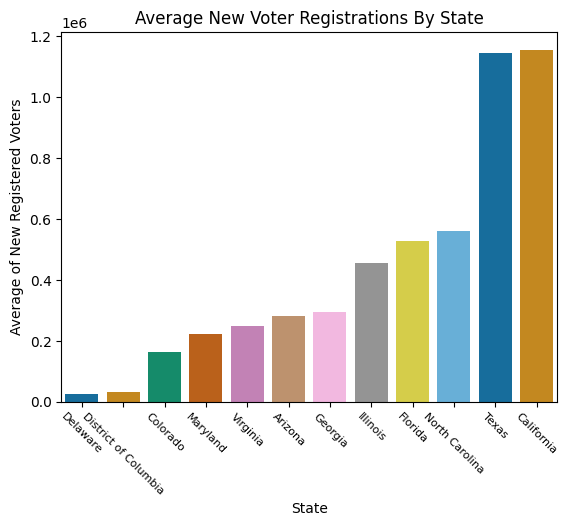

In [19]:
sns.barplot(state_averagedf,x="NAME",y="registered_voters", hue="NAME", palette="colorblind", legend=False)
plt.ylabel("Average of New Registered Voters")
plt.xlabel("State")
plt.xticks(rotation = -45, fontsize = 8)
plt.title("Average New Voter Registrations By State")
plt.show()

* The graph above is showing the total of new voter registration per state. One trend I noticed is that the bigger states (California,Texas) have more voter registrations and the smaller states, including Washington DC, have less, showing a relationship between new voter registrations and state population.

Produce a plot comparing voter registation in 2016 and 2020. (2 pts)
* Color the graph based on the month.(1 pt)
* Change the default color palette used. (1 pt)
* Comment on any trends you see. (2 pts)
* Add the appropriate labels and title (1)
* Comment on any trends you see (2 points)

(9 pts total)

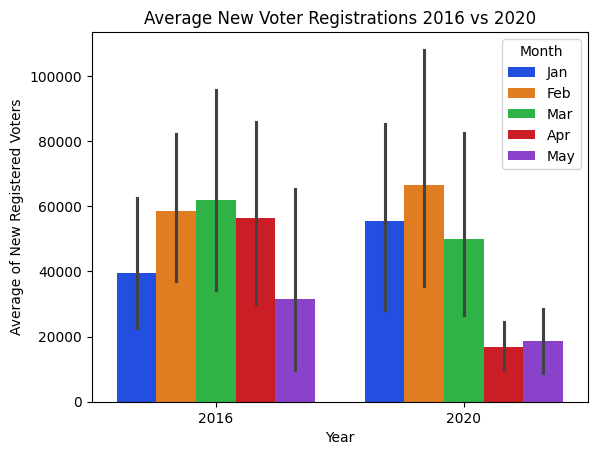

In [ ]:
sns.barplot(voters,x="Year",y="registered_voters", hue="Month", palette="bright")
plt.ylabel("Average of New Registered Voters")
plt.xlabel("Year")
plt.title("Average New Voter Registrations 2016 vs 2020")
plt.show()

* The bar chart above shows voter registration in 2016 vs 2020 seperated by month In 2016 march had the most voter registration with a smooth curve down before and after march. for 2020, feburary has the most new voters, with a steep decline in April and a tiny increase in May. Feburary of 2020 also has the most variation in data, with april having the least, but 2020 has a pretty equal distribution of variation as depicted by the black lines.

Create a data visualization that relates to either your state level research question or your national level reserach question. If one of your questions was answered by the above graphs, you may not use that question. (12 points)

In [ ]:
calivoters = voters.loc["NAME"] == "California"
calivoters            # making a dataset with only data from California, I used the dataset
                      # above that told me there were 8 total entries from California to make sure I had everything

,NAME,Year,Month,registered_voters
8,California,2016,Jan,87574
9,California,2016,Feb,103377
10,California,2016,Mar,174278
11,California,2016,Apr,185478
12,California,2020,Jan,151595
13,California,2020,Feb,238281
14,California,2020,Mar,176810
15,California,2020,Apr,38970


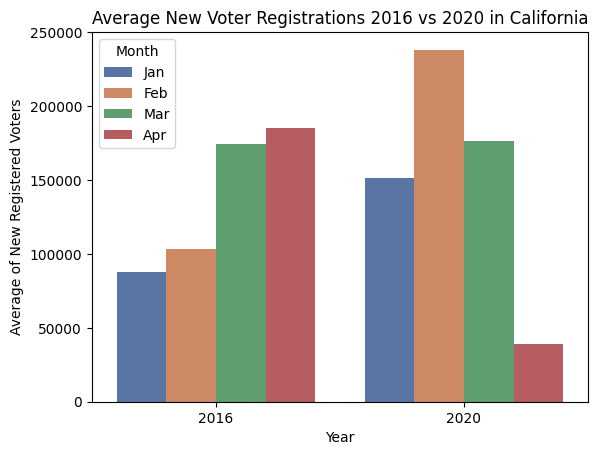

In [ ]:
sns.barplot(calivoters,x="Year",y="registered_voters", hue="Month", palette="deep")
plt.ylabel("Average of New Registered Voters")
plt.xlabel("Year")
plt.title("Average New Voter Registrations 2016 vs 2020 in California")
plt.show()

* This graph shows the difference in voter registration in only California. The data for California leaves out May so there is less data then the last graph. We can still see that Californias trends were different then the national in 2016, with new voters increasing all the way till april rather then decreasing in April like the national, however, in 2020 it follows the same trend as the national greatly decreasing in April.

##Notebook Conclusion  (15 points)

Write a conclusion section that includes
* Insights: the insights/outcomes of your notebook (5 points)
* Suggestions: Any suggestions or ideas you could offer your client (5 point)
* Possible next steps: At least one step that you would take if continuing to work with this project (5 points)

This should only be reflective of *your data* as presented here.


Each section should be at least 3-4 complete sentences.


* Insights: Overall we found that average new voter registration in the US increased from 2016 to 2020, showing more new engagement in the 2020 election when comparing the two. We also found that the monthly averages changed by year, with the highest amount of new voters shifting from March in 2016 to February in 2020. We then looked at voter registration in California and saw that it had a different trend by month then the national in 2016, with the most new voters registered in April, but following the same trend as the national in 2020 with the most new voters registered in March.

* Suggestions: I would suggest to my client to look at more states voter registration by month to see how it varies state by state, and how they all compare on a national level. This can help to push campaigns to get people to vote in the most popular months. I would also suggest to expect more voters to register every election as we see an increase in new voters as time goes on. I would also sugggest to get a more specific dataset if possible, maybe one that includes other demographic like age, race, and gender to study more trends to get a better understanding of the data.

* Next Steps: As stated before I think a good next step would be to check data from other states, similar to how I did for California to get a better understanding of how the month plays a role state by state. I would also look at data from other states as there is only about 12 states/regions listed on our dataset to get a better national understanding. I would then look into reasons why voter registration increased over the years, and loko at possible factors like population, campaigns ex. and look into why certain months have the most new voters registered.

##Stakeholder Analysis(14 points as noted)
*Loosely adapted from the [Cambridge Analytica/Facebook reveal](https://www.google.com/search?q=cambridge+analytica+facebook+&sca_esv=d43255849d412494&rlz=1C1ONGR_enUS1069US1069&sxsrf=AE3TifP9Zpi1D8vk3Z__wLxSQ-IMSAubZg%3A1758661179884&ei=OwrTaMHdNYmx5NoPkdTiqQY&ved=0ahUKEwiB56C34--PAxWJGFkFHRGqOGUQ4dUDCBA&uact=5&oq=cambridge+analytica+facebook+&gs_lp=Egxnd3Mtd2l6LXNlcnAiHWNhbWJyaWRnZSBhbmFseXRpY2EgZmFjZWJvb2sgMgoQIxiABBgnGIoFMgUQABiABDIIEAAYgAQYxwMyCBAAGIAEGMcDMggQABiABBjHAzIFEAAYgAQyCBAAGIAEGMcDMgYQABgWGB4yBhAAGBYYHjIGEAAYFhgeSJoJUI4DWI4DcAF4AZABAJgBa6ABa6oBAzAuMbgBA8gBAPgBAZgCAqAChAHCAgoQABiwAxjWBBhHmAMAiAYBkAYIkgcDMS4xoAelCLIHAzAuMbgHc8IHBTItMS4xyAcV&sclient=gws-wiz-serp) in 2018. While it is not necessary to look this up, it's always good to know*.

All answers should be in full sentences and in a text box, not code.

You work for a social media company which is currently allowing third party apps access to data through the use of an API; this means another company can create an app on your platform and acces the data of users who consent.

One such company is a lobbying group. They create a third party app called "Get Out and Vote!" that asks users about their voter registration and other habits. While users of the app must give consent, the app also allows the lobbying group to collect data on the social media habits of the friends of those who consented to the app. While only only a few hundred thousand partake in the original app, the company is still able to collect from millions of users.

They use this data to create personality profiles of unregistered voters. That data is then sold to specific political campaigns who use the information to create political ads that encourage people in populated US cities *not to vote* while creating ads that tell people in swing states *to vote*.

While it is not necessary to do research on swing states, here is some information about the demographics of that if you are [curious](https://www.npr.org/2024/09/06/nx-s1-5101765/swing-states-demographics-electorate).


Identify a key ethical issue here, from the standpoint of the social media company (3 points).

* One key ethical issue here is that while users are consenting to give data on voter registration, they are taking data from their friends without their consent and selling them to political campaigns which is violating their human rights and privacy

What are at least three of our ethical standards that apply to this situation, and why are they relevant (5 points).

* One ethical standard that applies here is promoting transparency from the Federal Data Staregy Ethical Framework, this applies because the social media company is not telling the users that their friends information is being sold, which is not being transparent about what they are doing with the data and what they are consenting to. Another ethical standard is respecting privacy and confidentiality which the company is violating by selling their private information to the political campaigns making thier private information available to others. A third ethical standard they are violating from the FDS is respecting the public, individuals, and communities. By selling their information without telling them you are not being respectful because you are using the users and their friends for your own gain at the expense of their privacy.

Your company wants to continue work with the lobbying firm and does not want to lose them as a client. Looking at this from a *utilitarian ethics* standpoint, propose an alternative action that allows you to work with them while still addressing the ethical issue you mentioned above (6 points).



* Utilitarian ethics states that an action is morally good if it produces the greatest amount of good, and is not morally good if it produces more harm than good. Working with the lobbyists is not morally good because its producing harm to way more people then its producing good, by taking millions of users information while only benefiting the lobbyist and the people directly consenting to give their data away. I would suggest if we need to keep working with the lobbying company we should give them an ultimatium that they need to stop taking data from peoples friends or we will cease to continue working together, as its a liability for us to continue violating people's rights to privacy. The lobbyists needs to explicitly state that the users information will be sold to political campiagns before asking them their information in a visible way that people will not skip over. On top of this, they need to completely stop taking information from peoples friends unless the friends consent beforehand, which would be near impossible to accomplish.

##Github (3 points)
Post this to your Github and include the accessible link either here or on brightspace.

https://github.com/cmadsen2004/325-Midterm

# Academic Integrity Statement

By writing my name in the cell below, I certify that:

1. I did not use resources other than:
   * the Python notebooks provided by the instructor,
   * links provided in this notebook,
   * the assigned readings, and
   * my own personal notes
2. This means that I did not:
   * look up anything on Google, or Stack Overflow, Chatgpt, &c.,
   * discuss the content of the exam with *anyone* other than the instructors or TAs, or
   * do anything that technically doen't break these rules but is against their spirit.

Christopher Madsen